#  SWB211 Project 
##### Prepared by SWB Team: Tyler Will, Stefanie Senger, Fracisco Avalos Jr., Won Fy Lee

## Executive Summary
* ### Identify eligible candidates to the Kansas City Scholars (KCS) program in the Kansas City metropolitan area. 
* ### The U.S. census and survey data used was found as close as possible to match the eligibility requirements of KCS applicants.
* ### Considerations on the findings given the approach is to be discussed:
    * ### Block-level Map of following features
        * #### Number of eligible population.
        * #### Population Density (Number of eligible population per sq mile).
        * #### Hot Spot Geospatial Analysis that shows statistically significant high/low density areas.

### Introduction
The goal of this project is to estimate the spatial distribution of Great Jobs KC eligible population using as fine-grained data as possible. 

An individual is eligible for Great Jobs KC if:

 1. 18 years or older ✅

 2. Live in one of the six eligible counties (KS: Wyandotte, Johnson; Missouri: Cass, Clay, Jackson, Platte) ✅

 3. Low or modest income evidenced by current earnings of less than $45,000 annually✅

 4. Has not previously earned a bachelor’s degree✅

 5. Has not previously been awarded a KC Scholarship (Traditional or Adult Learner)❓

 6. Not a current KC Scholars college scholarship awardee.❓

 7. Lawfully present in the United States or DACA eligible and DACA applied/approved.❓

### Data 

The lowest-level geography data available from Census is block-level. A census block in KC have an average population of 21. In terms of relative size, a census tract contains 70 blocks and a census block-group contains an average of 23 blocks. Despite the small size of the block, only total population count information is available at the block-level. 


The lowest-level geography data available for #1, #3 and #4 is block-group from 2021 American Community Survey. In addition, only marginal information of \%age, \%income and \%education is available, while the information we need to define eligible population is joint density of \%age X \%income X \%education. 

### Method

In order to derive the joint density, we assume variable independence (Assumption 1):

 \begin{align}
 Pr(I,E,A|bg)=Pr(I|bg)Pr(E|bg)Pr(A|bg)
  \label{eq1}\tag{1} \\
 \end{align}
 
where  Block=b, Block-group=bg, Income=I, Education=E, Age=A.

 In order to leverage both block and block-group level data available, we consolidate the data from two different levels of geography by assuming that populations in blocks within a same block-group share same %age, %income and %education defined at the block-group, while respecting the total population counts defined at the block-level (Assumption 2):
 
 \begin{align}
         N(I, E, A|b,bg) = Pr(I,E,A|bg)*N(b|bg)
  \label{eq2}\tag{2} \\
 \end{align}
 
#### Adjustment to Assumption 1:

We found high correlation between \%income and \% education (~= 0.9). To adjust high correlation between \% low income and \% education lt BA, we run a simple bivariate linear regression with independent variable (X) defined as \% annual income less than 45,000 dollars and dependent variable (Y) set as \% population with less than bachelors degree. We use \% education instead of \%income as dependent variable, simply because the \% low education is much higher than the \% income less than 45k (63\% vs 54\%). The predicted value out of this regression gives us an adjusted share for Pr(I|bg) that account for the correlation between the two variable and it is strictly larger than the original Pr(I|bg).


\begin{align}
\underbrace{\hat{Y}}_{\%education} =\underbrace{\alpha}_{intercept} + \underbrace{\beta}_{slope} * \underbrace{X}_{\%income} +\underbrace{\epsilon}_{error}  \label{eq3}\tag{3} \\
 \end{align}
 

See Sections 9 - 13.

### Preliminary Results

 * We find that there are 611,675 eligible population in the Kansas city 6 counties. The eligible population make up 31 percent of total population in the 6 counties (=611,675/1,964,222).
 * The three maps presented below show spatial information about the eligible population:
      1. N of eligible population (Block-level)
      2. N of eligible popluation per sq mile (Block-level)
      3. Hot spots of eligible population
 
 * [Block-level outcome data](https://drive.google.com/file/d/1ZKh9Ub0oWdtFMsucgcXdWBRb2oqMJpU4/view?usp=sharing)
     
 * [List of zipcode with rank ordered by the density of eligible population](https://docs.google.com/spreadsheets/d/12_JI2aAmCzH1VGi3ocEYxKKIdCQsDy4vBT2fB3BRzMU/edit#gid=0)



 



In [53]:
%%html
<iframe src="https://swb211.netlify.app/target_v2" width="1200" height="1000"></iframe>

In [1]:
%%html
<iframe src="https://swb211.netlify.app/target_v3" width="1200" height="1000"></iframe>

In [47]:
%%html
<iframe src="https://swb211.netlify.app/target_v4" width="1200" height="1000"></iframe>

In [51]:
%%html


   <table style="font-size:0.9em">
    	<thead><tr>
            <th> </th>
            <th>N</th>            
            <th>Mean</th> 

        </tr></thead>
        <tbody><tr>
            <td>s_bg_age_gt18</td>
            <td>37700</td>            
            <td>0.75</td> 

        </tr>
        <tr>
            <td>s_pinc_lt_45k</td>
            <td>37700</td>
            <td>0.56</td> 

        </tr>
        <tr>
            <td>s_bg_educ_lt_bachelors</td>
            <td>37700</td>
            <td>0.63</td> 
           
        </tr>
        <tr>
            <td>s_joint_age_educ_inc</td>
            <td>37700</td>
            <td>0.33</td> 
            
        </tr>
               
    </tbody>
    </table>

,N,Mean
s_bg_age_gt18,37700,0.75
s_pinc_lt_45k,37700,0.56
s_bg_educ_lt_bachelors,37700,0.63
s_joint_age_educ_inc,37700,0.33


In [52]:
%%html
<table style="font-size:0.8em">
    	<thead><tr>
            <th>County</th>
            <th>N CensusTract</th>            
            <th>N BlockGroup</th>
            <th>N Block</th>
            <th>Blocks per BG</th> 

        </tr></thead>
        <tbody><tr>
            <td>Cass</td>
            <td>24</td>            
            <td>83</td>
            <td>3571</td>
            <td>43</td> 

        </tr>
        <tr>
            <td>Clay</td>
            <td>55</td>
            <td>192</td>
            <td>5222</td>
            <td>27</td> 

        </tr>
        <tr>
            <td>Jackson</td>
            <td>227</td>
            <td>640</td>
            <td>14842</td>
             <td>23</td> 
           
        </tr>
        <tr>
            <td>Johnson</td>
            <td>154</td>
            <td>462</td>
            <td>8235</td>
            <td>18</td> 
            
        </tr>
        <tr>
            <td>Platte</td>
            <td>26</td>
            <td>80</td>
            <td>2475</td>
            <td>31</td> 
            
        </tr>
        <tr>
            <td>Wyandotte</td>
            <td>64</td>
            <td>165</td>
            <td>3355</td>
            <td>20</td> 
            
        </tr>    
        <tr>
            <td>Total</td>
            <td>550</td>
            <td>1622</td>
           <td>37700</td>
            <td>23</td> 
            
        </tr>              
    </tbody>
</table>

County,N CensusTract,N BlockGroup,N Block,Blocks per BG
Cass,24,83,3571,43
Clay,55,192,5222,27
Jackson,227,640,14842,23
Johnson,154,462,8235,18
Platte,26,80,2475,31
Wyandotte,64,165,3355,20
Total,550,1622,37700,23


## code begins here-------------------------------------------------------
## Joint Density Calculation
### Data downloaded from https://www.nhgis.org/

- 2020 Census, Block level
  - Total Population Counts
- 2021 American Community Survey: 5-Year Data, Block-group level
  - Counts by age
  - Counts by education 
  - Counts by earnings




### 1. Imports

In [1]:
import pandas as pd 
import os

### Path Management
using [`os.path.join`](https://docs.python.org/3/library/os.path.html), to fit the paths for Linux/MacOS and Windows syntax, which is more robust:
* Linux/MacOS syntax (e.g. `../folder_name`) 
* and Windows syntax (e.g. `..\\folder_name`) 

In [2]:
wd='/Users/wonfylee/Library/CloudStorage/GoogleDrive-leex5089@umn.edu/My Drive/0.SWB/SWB211'

csv_path_population_block = os.path.join(wd, 'census_data', 'nhgis0202_csv', 'nhgis0202_ds248_2020_block.csv')
csv_path_education_income = os.path.join(wd, 'census_data', 'nhgis0197_csv', 'nhgis0197_ds254_20215_blck_grp.csv')
csv_path_personal_income = os.path.join(wd, 'census_data', 'nhgis0205_csv', 'nhgis0205_ds254_20215_blck_grp.csv')

csv_path_age = os.path.join(wd, 'census_data', 'nhgis0203_csv', 'nhgis0203_ds254_20215_blck_grp.csv')

dta_path_6_counties = os.path.join(wd, 'intermediate_data', 'b_KC_6counties.dta')
dta_path_county_crosswalk = os.path.join(wd, 'intermediate_data', 'b_bg_county_crosswalk.dta')

### 2. DataFrame of population count per house block
#### [Download block-level Data](https://drive.google.com/file/d/1PpBdZLxjuU8gYFRaH1YH8Mo_jQyvucTD/view?usp=share_link)
#### [Download codebook](https://drive.google.com/file/d/1Q07GfUr7E_S7Of81rsdNRAorfGjtKotN/view?usp=share_link)


In [3]:
block_raw = pd.read_csv(csv_path_population_block, low_memory=False)
block_raw.columns = block_raw.columns.str.lower()
 
block_data = block_raw[['gisjoin', 'state','county','u7b001']]
block_data = block_data.rename(columns={'gisjoin': 'b_gisjoin'})                
block_data = block_data.rename(columns={'u7b001': 'b_population'}) # b_target_pop: Block level estimate of total population.

block_data            
block_data['b_population'].mean()

21.33652070461633

### 3. DataFrame of household income and individual's educational status accumulated per block group
A block group is a collection of several house blocks; approximatly 30-50 blocks form a block group.
#### [Download block group-level Data](https://drive.google.com/file/d/1Pk3rLOX4K3efD69GoOQ5lFa2apiqGJPM/view?usp=share_link  )
#### [Download codebook](https://drive.google.com/file/d/1PfbiBFwF5PAS1Kq6Fdy8_6klsqOxRE5b/view?usp=share_link)

Note: We use personal earnings data instead of household income in the analysis.


In [4]:
blockgroup_raw = pd.read_csv(csv_path_education_income)
blockgroup_raw.columns = blockgroup_raw.columns.str.lower()
col_list=blockgroup_raw[['aop8e002', 'aop8e003', 'aop8e004', 'aop8e005', 'aop8e006', 'aop8e007', 'aop8e008' ,'aop8e009', 'aop8e010', 'aop8e011', 'aop8e012', 'aop8e013', 'aop8e014', 'aop8e015', 'aop8e016', 'aop8e017', 'aop8e018', 'aop8e019', 'aop8e020', 'aop8e021']]
blockgroup_raw['bg_educ_lt_bachelors']=col_list.sum(axis=1) # summing population count below bachelor's degree
col_list=blockgroup_raw[['aoqhe002', 'aoqhe003', 'aoqhe004', 'aoqhe005', 'aoqhe006', 'aoqhe007', 'aoqhe008', 'aoqhe009']]
blockgroup_raw['bg_inc_lt_45000']=col_list.sum(axis=1) # summing housdhold inclome below 45 k

blockgroup_raw['s_bg_educ_lt_bachelors']=blockgroup_raw['bg_educ_lt_bachelors']/blockgroup_raw['aop8e001'] # percentage of non-BA's over whole population (creates Nan values where the population per block group is 0)
blockgroup_raw['s_bg_inc_lt_45000']=blockgroup_raw['bg_inc_lt_45000']/blockgroup_raw['aoqhe001'] # percentage of low earning households over all housholds (creates Nan values where the population per block group is 0)
blockgroup_raw = blockgroup_raw.rename(columns={'gisjoin': 'bg_gisjoin'})                
bg_educ_inc=blockgroup_raw[['bg_gisjoin', 'bg_educ_lt_bachelors','bg_inc_lt_45000','s_bg_educ_lt_bachelors','s_bg_inc_lt_45000']]

bg_educ_inc

,bg_gisjoin,bg_educ_lt_bachelors,bg_inc_lt_45000,s_bg_educ_lt_bachelors,s_bg_inc_lt_45000
0,G20000109526001,1146,195,0.861007,0.281792
1,G20000109527001,548,210,0.734584,0.466667
2,G20000109527002,527,110,0.780741,0.303867
3,G20000109528001,521,240,0.785822,0.551724
4,G20000109528002,650,252,0.672878,0.464945
...,...,...,...,...,...
7487,G29051001277001,661,211,0.937589,0.703333
7488,G29051001277002,654,289,1.000000,0.865269
7489,G29051001277003,176,79,0.752137,0.576642
7490,G29051001278001,959,982,0.762928,0.891916


### 4. DataFrame of population's age accumulated per block group
#### [Download block group-level Data](https://drive.google.com/file/d/1Q5OGL-dRmYbJO7Q8WGjSahMS3s1QBnAI/view?usp=share_link )
#### [Download codebook](https://drive.google.com/file/d/1Q7LJjJytZHH-n66zZ5RvwTxnMIus9lLX/view?usp=share_link)

A block group is a collection of several house blocks; approximatly 30-50 blocks form a block group.

In [5]:
blockgroup_raw = pd.read_csv(csv_path_age)
blockgroup_raw.columns = blockgroup_raw.columns.str.lower()
blockgroup_raw.describe()
print(blockgroup_raw.info())
blockgroup_raw.dtypes 
col_list=blockgroup_raw[['aonte007', 'aonte008', 'aonte009', 'aonte010', 'aonte011', 'aonte012', 'aonte013', 'aonte014', 'aonte015', 'aonte016' ,'aonte017', 'aonte018', 'aonte019' ,'aonte020', 'aonte021', 'aonte022', 'aonte023' ,'aonte024' ,'aonte025' ,'aonte031' ,'aonte032', 'aonte033', 'aonte034' ,'aonte035', 'aonte036', 'aonte037', 'aonte038', 'aonte039', 'aonte040', 'aonte041', 'aonte042', 'aonte043', 'aonte044', 'aonte045', 'aonte046', 'aonte047', 'aonte048', 'aonte049']]
blockgroup_raw['bg_age_gt18']=col_list.sum(axis=1) # summing population count 18 years and older
blockgroup_raw['s_bg_age_gt18']=blockgroup_raw['bg_age_gt18']/blockgroup_raw['aonte001'] # percentage of population 18 years and older over whole population (creates Nan values where the population per block group is 0)
blockgroup_raw = blockgroup_raw.rename(columns={'gisjoin': 'bg_gisjoin'})
bg_age=blockgroup_raw[['bg_gisjoin', 'bg_age_gt18','s_bg_age_gt18']]

bg_age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Columns: 1001 entries, gisjoin to aoslm036
dtypes: float64(76), int64(917), object(8)
memory usage: 57.2+ MB
None


,bg_gisjoin,bg_age_gt18,s_bg_age_gt18
0,G20000109526001,1415,0.769859
1,G20000109527001,845,0.795669
2,G20000109527002,726,0.823129
3,G20000109528001,841,0.819688
4,G20000109528002,1221,0.822222
...,...,...,...
7487,G29051001277001,747,0.772492
7488,G29051001277002,784,1.000000
7489,G29051001277003,318,0.736111
7490,G29051001278001,1598,0.820329


### 5. DataFrame of population's personal income (earnings) per block group
#### [Download block group-level Data](https://drive.google.com/file/d/1v8Fl1LpxaeQ13p56kd8M9Byug0cOKqZi/view?usp=share_link)
#### [Download codebook](https://drive.google.com/file/d/1v8YW6t1JpYowCY-O74lx4n1FbRZbboXe/view?usp=share_link)
Table: B20001. Sex by Earnings in the Past 12 Months (in 2021 Inflation-Adjusted Dollars) for the Population 16 Years and Over with Earnings in the Past 12 Months

Universe: Population 16 years and over with earnings

#### Earnings
As noted above, in Census Bureau terminology, earnings are a subset of income. Specifically, earnings are wages or salary from a job, or income from being self-employed. Other kinds of income, not included in earnings, include social security payments, interest and dividends, income from property rental, pensions, public assistance, and child support.
 

In [6]:
blockgroup_raw = pd.read_csv(csv_path_personal_income)
blockgroup_raw.columns = blockgroup_raw.columns.str.lower()
blockgroup_raw.describe()
print(blockgroup_raw.info())
blockgroup_raw.dtypes 
col_list=blockgroup_raw[['aor6e003', 'aor6e004', 'aor6e005', 'aor6e006', 'aor6e007', 'aor6e008', 'aor6e009', 'aor6e010', 'aor6e011', 'aor6e012', 'aor6e013', 'aor6e014', 'aor6e015', 'aor6e016', 'aor6e024' ,'aor6e025', 'aor6e026', 'aor6e027', 'aor6e028', 'aor6e029', 'aor6e030', 'aor6e031', 'aor6e032', 'aor6e033', 'aor6e034', 'aor6e035', 'aor6e036', 'aor6e037']]
blockgroup_raw['bg_pinc_lt_45k']=col_list.sum(axis=1) # summing population count 18 years and older
blockgroup_raw['s_bg_pinc_lt_45k']=blockgroup_raw['bg_pinc_lt_45k']/blockgroup_raw['aor6e001'] # percentage of population 18 years and older over whole population (creates Nan values where the population per block group is 0)
blockgroup_raw = blockgroup_raw.rename(columns={'gisjoin': 'bg_gisjoin'})
bg_personal_income=blockgroup_raw[['bg_gisjoin', 'bg_pinc_lt_45k','s_bg_pinc_lt_45k']]

bg_personal_income

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Columns: 129 entries, gisjoin to aor6m043
dtypes: float64(30), int64(91), object(8)
memory usage: 7.4+ MB
None


,bg_gisjoin,bg_pinc_lt_45k,s_bg_pinc_lt_45k
0,G20000109526001,523,0.561159
1,G20000109527001,444,0.805808
2,G20000109527002,324,0.642857
3,G20000109528001,434,0.811215
4,G20000109528002,539,0.707349
...,...,...,...
7487,G29051001277001,232,0.760656
7488,G29051001277002,251,0.886926
7489,G29051001277003,165,0.868421
7490,G29051001278001,734,0.890777


### 6. prepare cross-walk data 

In [7]:
##b_KC_6counties
b_KC_6counties = pd.read_stata(dta_path_6_counties)
b_KC_6counties.columns = b_KC_6counties.columns.str.lower()

##JOIN
b_bg_county_crosswalk = pd.read_stata(dta_path_county_crosswalk)
b_bg_county_crosswalk.columns = b_bg_county_crosswalk.columns.str.lower()
b_bg_county_crosswalk = b_bg_county_crosswalk[['b_gisjoin', 'bg_gisjoin']] # cutting down on unnecessary columns

b_KC_6counties
b_bg_county_crosswalk


,b_gisjoin,bg_gisjoin
0,G20009100500001000,G20009100500001
1,G20009100500001001,G20009100500001
2,G20009100500001002,G20009100500001
3,G20009100500001003,G20009100500001
4,G20009100500001004,G20009100500001
...,...,...
37696,G29016509800001121,G29016509800001
37697,G29016509800001122,G29016509800001
37698,G29016509800001123,G29016509800001
37699,G29016509800001124,G29016509800001


### 7. Merge block and block-group data

In [8]:
#merge B and BG level data, calculate target_density 
merge1=pd.merge(block_data, b_KC_6counties,on=['b_gisjoin' ])  # merge to restrict area to 6 counties in KC (426161 to 37701)
merge2=pd.merge(merge1, b_bg_county_crosswalk,on=['b_gisjoin' ])  # block block-group county crosswalk file
merge3=pd.merge(merge2, bg_age,on=['bg_gisjoin' ])  # add bg-level age
merge4=pd.merge(merge3, bg_educ_inc,on=['bg_gisjoin' ])  # add bg-level bg_educ_inc
merge5=pd.merge(merge4, bg_personal_income,on=['bg_gisjoin' ])  # add bg-level bg_educ_inc



# merge4.isna().sum().sort_values(ascending=False) # checking for Nan values
merge5 = merge5.fillna(0) # replacing Nan values with 0 
                          # (admissible, because those came into being by devision by 0 where the population count per block group was 0)
                          # (the percentage of target populaton in block groups without any population should be 0, presupposedly the data is correct)

        
        
merge5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37701 entries, 0 to 37700
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   b_gisjoin               37701 non-null  object 
 1   state                   37701 non-null  object 
 2   county                  37701 non-null  object 
 3   b_population            37701 non-null  int64  
 4   fid                     37701 non-null  int32  
 5   shape_area              37701 non-null  float32
 6   bg_gisjoin              37701 non-null  object 
 7   bg_age_gt18             37701 non-null  int64  
 8   s_bg_age_gt18           37701 non-null  float64
 9   bg_educ_lt_bachelors    37701 non-null  int64  
 10  bg_inc_lt_45000         37701 non-null  int64  
 11  s_bg_educ_lt_bachelors  37701 non-null  float64
 12  s_bg_inc_lt_45000       37701 non-null  float64
 13  bg_pinc_lt_45k          37701 non-null  int64  
 14  s_bg_pinc_lt_45k        37701 non-null

### 8. Calculate joint density of target population
In this case, we assume indepencence between the variables income, age and educational status, thus getting the joint probability P(I,E,A|bg)=P(I|bg)P(E|bg)Pr(A|bg). 

Response to Stefanie: for "target_pop_per_sq_mile" just wanted to change from per sq meter to per sq mile, so just needed a bracket in the denominator (merge5['shape_area'] / whole_area_6_counties)!

In [9]:
whole_population_6_counties=merge5['b_population'].sum()
whole_area_6_counties = 2589973.632302

# joint probability age*educ*income of target population
merge5['s_joint_age_educ_inc']=merge5['s_bg_age_gt18']*merge5['s_bg_educ_lt_bachelors']*merge5['s_bg_pinc_lt_45k']

# block-level estimate of target population
merge5['b_target_pop']=merge5['b_population']*merge5['s_joint_age_educ_inc']

# calculating density and distribution per sq miles
merge5['target_density']=(merge5['b_target_pop'] / whole_population_6_counties).fillna(0)
merge5['target_pop_per_sq_mile']=merge5['b_target_pop'] / (merge5['shape_area'] / whole_area_6_counties)



#### Working comment: Assuming independence of our variables (income, age and educational status) plus the very strict definition of household income instead of individual income makes us miss most of the target population.

##### Response: To address the concern about high correlation between income and educational status. I propose following adjustment to the density calculation.


### 9. check correlation between income and education

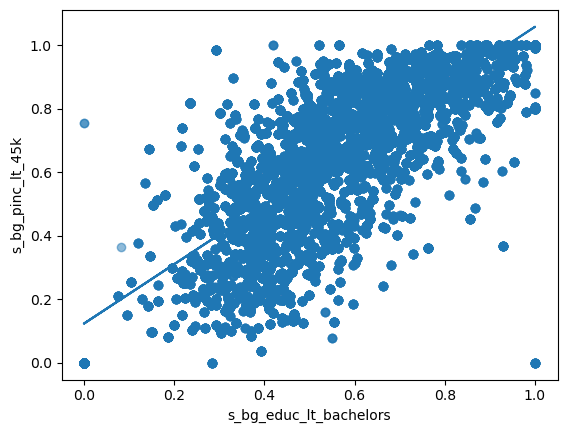

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(merge5['s_bg_pinc_lt_45k'], merge5['s_bg_educ_lt_bachelors'],  alpha=0.5)

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(merge5['s_bg_pinc_lt_45k'],  merge5['s_bg_educ_lt_bachelors'], 1)

#add linear regression line to scatterplot 
x_pinc_lt_45k=merge5['s_bg_pinc_lt_45k']
plt.plot(merge5['s_bg_pinc_lt_45k'], m*x_pinc_lt_45k+b)
plt.xlabel("s_bg_educ_lt_bachelors")
plt.ylabel("s_bg_pinc_lt_45k")
plt.show()

### 10. check correlation between income and age

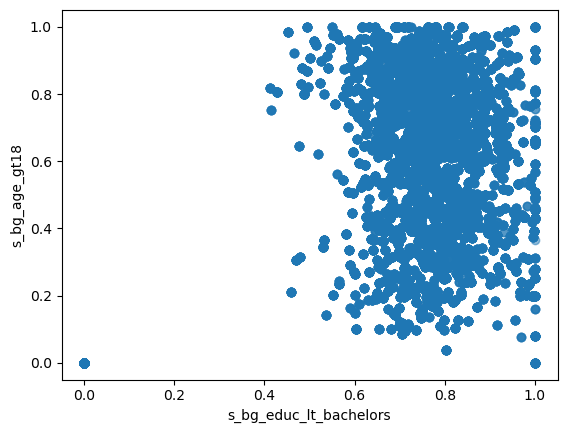

In [11]:
plt.scatter(merge5['s_bg_age_gt18'], merge5['s_bg_educ_lt_bachelors'],  alpha=0.5)
plt.xlabel("s_bg_educ_lt_bachelors")
plt.ylabel("s_bg_age_gt18")
plt.show()

#age correlation is low with other two vars.

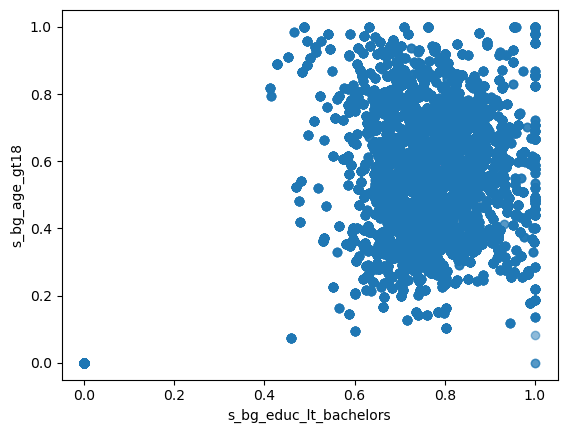

In [12]:
plt.scatter(merge5['s_bg_age_gt18'], merge5['s_bg_pinc_lt_45k'],  alpha=0.5)
plt.xlabel("s_bg_educ_lt_bachelors")
plt.ylabel("s_bg_age_gt18")
plt.show()

#age correlation is low with other two vars.

### 11. Adjustment to the high correlation between educ and income based on eq (3)

In [13]:
from sklearn.linear_model import LinearRegression


merge5 = merge5.dropna(axis=0)
# Create a numpy array of data:
x = np.array(merge5['s_bg_pinc_lt_45k']).reshape((-1, 1))
y = np.array(merge5['s_bg_educ_lt_bachelors'])
#run bivariate linear regression
regr =  LinearRegression()
results=regr.fit(x,y)

# Make adjustment index (predicted y) based on equation (1)
merge5['y_pred'] = regr.predict(x).reshape((-1, 1))

print("Coefficients: \n", regr.coef_) # coefficient of 0.93 suggest high correlation between the two variables.
print("predicted y: \n", merge5['y_pred'].mean())
print("y: \n", y.mean())
print("x: \n", x.mean())


Coefficients: 
 [0.93413271]
predicted y: 
 0.6324534969310122
y: 
 0.632453496931012
x: 
 0.5446789080033402


#### replace predicted value to 1 if y_pred>1, because a fraction can't go over 1.

In [14]:
merge5.loc[merge5.y_pred > 1, 'y_pred'] = 1


#### As shown in the graph below, it is basically addition of intercept and slope*\%income to the original \%income data. The mean of y_pred is 0.63, while the original mean of \%income is 0.54. I propose to use y_pred instead of s_bg_pinc_lt_45k in calculating the joint density.

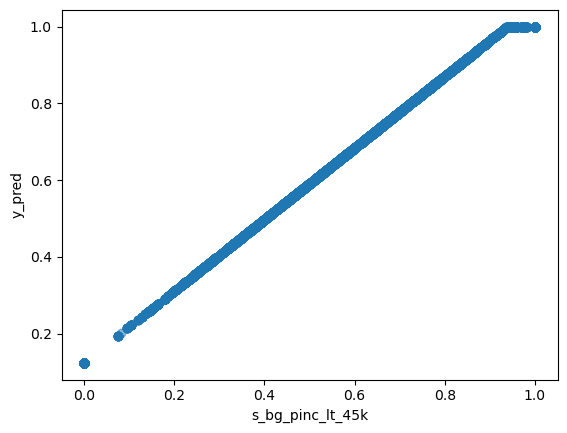

s_bg_pinc_lt_45k: 
 0.5446789080033402
y_pred: 
 0.6318152678099239


In [15]:
plt.scatter(merge5['s_bg_pinc_lt_45k'], merge5['y_pred'],  alpha=0.5)
plt.xlabel("s_bg_pinc_lt_45k")
plt.ylabel("y_pred")
plt.show()
print("s_bg_pinc_lt_45k: \n", merge5['s_bg_pinc_lt_45k'].mean())
print("y_pred: \n", merge5['y_pred'].mean())

### 12. Revision of joint density, call it s_joint_age_educ_inc_adj

In [16]:

# joint probability age*educ*income of target population (using y_pred)
merge5['s_joint_age_educ_inc_adj']=merge5['s_bg_age_gt18']*merge5['s_bg_educ_lt_bachelors']*merge5['y_pred']

# block-level estimate of target population
merge5['b_target_pop_adj']=merge5['b_population']*merge5['s_joint_age_educ_inc_adj']

# calculating density and distribution per sq miles
merge5['target_density_adj']=(merge5['b_target_pop_adj'] / whole_population_6_counties).fillna(0)
merge5['target_pop_per_sq_mile_adj']=merge5['b_target_pop_adj'] / (merge5['shape_area'] / whole_area_6_counties)



### 13. After the adjustment for correlation between income and education, joint density changes from 0.29 to 0.33

In [17]:

print("s_joint_age_educ_inc: \n", merge5['s_joint_age_educ_inc'].mean())
print("s_joint_age_educ_inc_adj: \n", merge5['s_joint_age_educ_inc_adj'].mean())
merge5.info()


s_joint_age_educ_inc: 
 0.29059760078943736
s_joint_age_educ_inc_adj: 
 0.3308518894458803
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37701 entries, 0 to 37700
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   b_gisjoin                   37701 non-null  object 
 1   state                       37701 non-null  object 
 2   county                      37701 non-null  object 
 3   b_population                37701 non-null  int64  
 4   fid                         37701 non-null  int32  
 5   shape_area                  37701 non-null  float32
 6   bg_gisjoin                  37701 non-null  object 
 7   bg_age_gt18                 37701 non-null  int64  
 8   s_bg_age_gt18               37701 non-null  float64
 9   bg_educ_lt_bachelors        37701 non-null  int64  
 10  bg_inc_lt_45000             37701 non-null  int64  
 11  s_bg_educ_lt_bachelors      37701 non-null  float64
 1

In [18]:
final_block_data=merge5[['fid', 'county' ,'bg_gisjoin' ,'b_gisjoin' ,'b_population', 'bg_age_gt18', 'bg_educ_lt_bachelors', 'bg_inc_lt_45000','s_bg_age_gt18', 's_bg_educ_lt_bachelors', 's_bg_inc_lt_45000', 'target_density', 's_joint_age_educ_inc_adj' ,'b_target_pop_adj', 'target_pop_per_sq_mile_adj', 'target_density_adj']]
final_block_data

,fid,county,bg_gisjoin,b_gisjoin,b_population,bg_age_gt18,bg_educ_lt_bachelors,bg_inc_lt_45000,s_bg_age_gt18,s_bg_educ_lt_bachelors,s_bg_inc_lt_45000,target_density,s_joint_age_educ_inc_adj,b_target_pop_adj,target_pop_per_sq_mile_adj,target_density_adj
0,0,Johnson County,G20009100500001,G20009100500001000,52,480,237,130,0.914286,0.697059,0.546218,0.000013,0.544359,28.306653,2634.734136,0.000014
1,1,Johnson County,G20009100500001,G20009100500001001,47,480,237,130,0.914286,0.697059,0.546218,0.000012,0.544359,25.584860,2462.999584,0.000013
2,2,Johnson County,G20009100500001,G20009100500001002,51,480,237,130,0.914286,0.697059,0.546218,0.000013,0.544359,27.762294,2725.120951,0.000014
3,3,Johnson County,G20009100500001,G20009100500001003,58,480,237,130,0.914286,0.697059,0.546218,0.000015,0.544359,31.572805,3020.188740,0.000016
4,4,Johnson County,G20009100500001,G20009100500001004,138,480,237,130,0.914286,0.697059,0.546218,0.000035,0.544359,75.121503,2611.948759,0.000038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37696,37696,Platte County,G29016509800001,G29016509800001121,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37697,37697,Platte County,G29016509800001,G29016509800001122,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37698,37698,Platte County,G29016509800001,G29016509800001123,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37699,37699,Platte County,G29016509800001,G29016509800001124,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 14. Save Final Output File

In [19]:

csv_path_export = os.path.join(wd, 'intermediate_data', 'block_level_target_population_outofpython_20230427.csv')

final_block_data.to_csv(csv_path_export,index=False)

Note: Output csv file was joined and converted to GIS shapefile in ArcGIS.

### 15. Exploration of Final GIS data

In [199]:

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

In [21]:
shape_path_gdf_kc_6county = os.path.join(wd, 'gis_data', 'b_zip_kc_6_counties_union.shp')

gdf_kc_6county = gpd.read_file(shape_path_gdf_kc_6county)



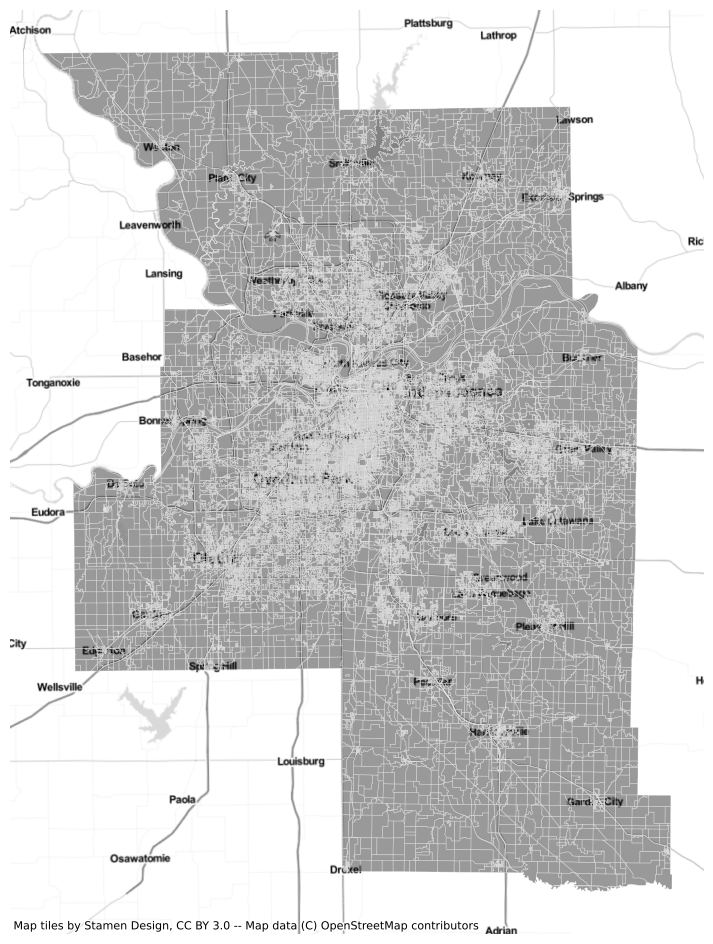

In [224]:
# plot it! This is the map of 6 counties KC area with block boundaries.
fig, ax = plt.subplots(figsize=(12,12))

gdf_kc_6county.plot(ax=ax,
         color='black', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax, crs=county_map.crs.to_string(), zoom=10, source=ctx.providers.Stamen.TonerLite)


In [48]:
final_csv = os.path.join(wd, 'intermediate_data', 'block_level_target_population_outofpython_20230427.csv') ## final csv file with all key features


In [49]:
block_final_csv = pd.read_csv(final_csv, low_memory=False)


In [50]:
gis_map_final=pd.merge(gdf_kc_6county, block_final_csv,on=['b_gisjoin' ])  # merge block map and output file.

In [51]:
gis_map_final.head()

,FID_zip_KC,GISJOIN,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,Shape_Leng,Shape_Area,b_gisjoin,state,...,bg_educ_lt_bachelors,bg_inc_lt_45000,s_bg_age_gt18,s_bg_educ_lt_bachelors,s_bg_inc_lt_45000,target_density,s_joint_age_educ_inc_adj,b_target_pop_adj,target_pop_per_sq_mile_adj,target_density_adj
0,0,G64012,64012,64012,B5,G6350,60516.96525,1.231256e+08,G29003700600011000,Missouri,...,384,114,0.897045,0.423374,0.231237,0.000000e+00,0.182441,0.000000,0.000000,0.000000e+00
1,0,G64012,64012,64012,B5,G6350,60516.96525,1.231256e+08,G29003700600011001,Missouri,...,384,114,0.897045,0.423374,0.231237,6.645384e-07,0.182441,1.641972,0.932577,8.359402e-07
2,0,G64012,64012,64012,B5,G6350,60516.96525,1.231256e+08,G29003700600011002,Missouri,...,384,114,0.897045,0.423374,0.231237,0.000000e+00,0.182441,0.000000,0.000000,0.000000e+00
3,0,G64012,64012,64012,B5,G6350,60516.96525,1.231256e+08,G29003700600011003,Missouri,...,384,114,0.897045,0.423374,0.231237,3.691880e-07,0.182441,0.912207,101.638757,4.644112e-07
4,0,G64012,64012,64012,B5,G6350,60516.96525,1.231256e+08,G29003700600011004,Missouri,...,384,114,0.897045,0.423374,0.231237,0.000000e+00,0.182441,0.000000,0.000000,0.000000e+00


### Comparison of key features and estimated share of eligible population

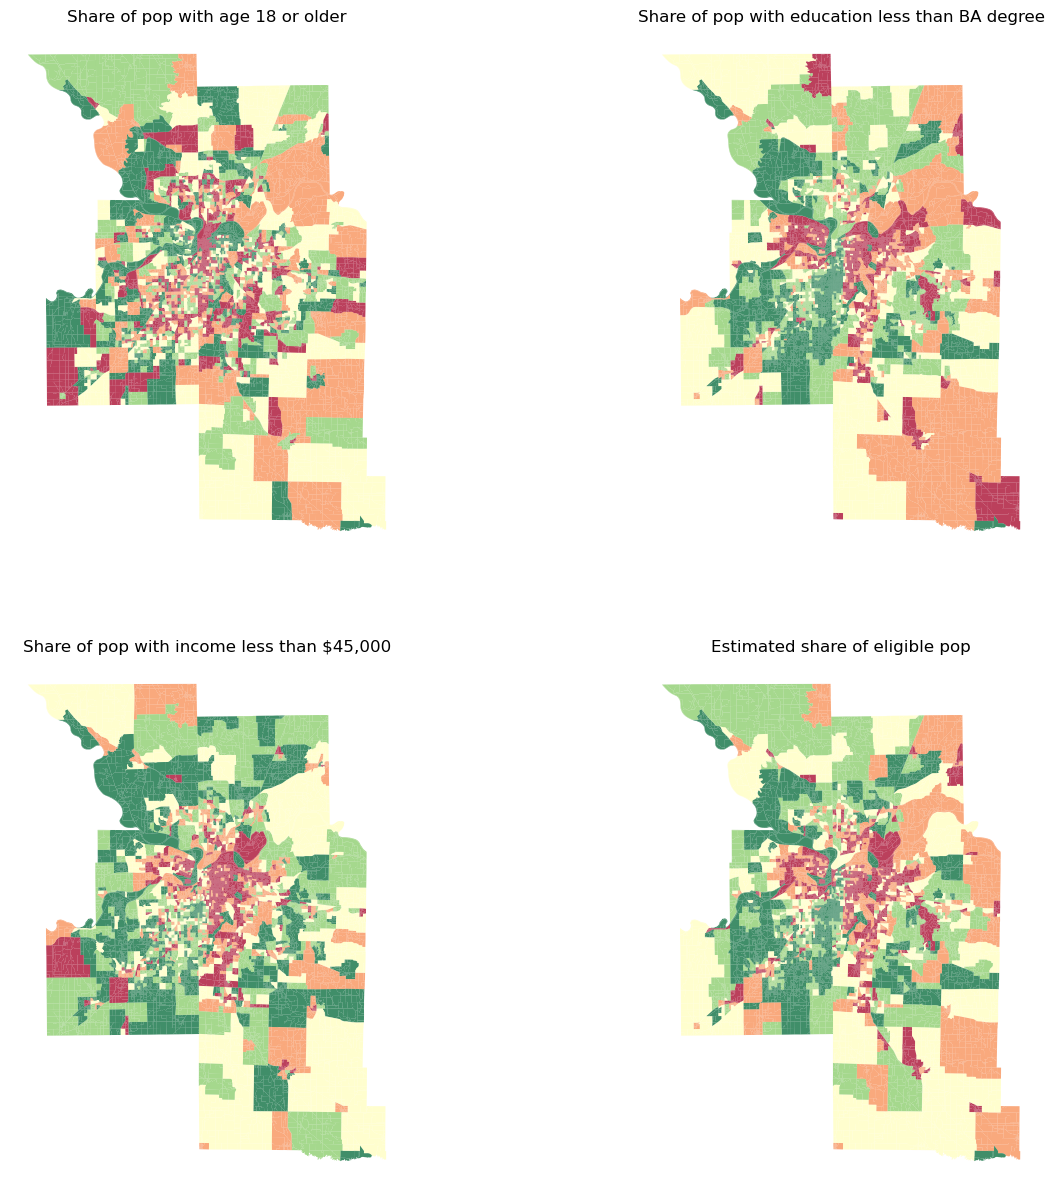

In [52]:
# create the 1x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
gis_map_final.plot(ax=ax[0,0], # this assigns the map to the left subplot
         column='s_bg_age_gt18', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75, 
           )


ax[0,0].axis("off")
ax[0,0].set_title("Share of pop with age 18 or older")

# spatial lag map on the right
gis_map_final.plot(ax=ax[0,1], # this assigns the map to the right subplot
         column='s_bg_educ_lt_bachelors', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75
           )

ax[0,1].axis("off")
ax[0,1].set_title("Share of pop with education less than BA degree")


# spatial lag map on the right
gis_map_final.plot(ax=ax[1,0], # this assigns the map to the right subplot
         column='s_bg_inc_lt_45000', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75
           )

ax[1,0].axis("off")
ax[1,0].set_title("Share of pop with income less than $45,000")

# spatial lag map on the right
gis_map_final.plot(ax=ax[1,1], # this assigns the map to the right subplot
         column='s_joint_age_educ_inc_adj', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75
           )

ax[1,1].axis("off")
ax[1,1].set_title("Estimated share of eligible pop")



plt.show()

### County-level map descriptive

In [163]:
sub=gis_map_final[['state','county_x']].drop_duplicates() ##keep the unique state-county information from the final map data.

In [164]:
sub=sub.rename(columns={'county_x':'county'}) ## rename for merge

In [165]:
sub.head()

,state,county
0,Missouri,Cass County
627,Missouri,Jackson County
1703,Missouri,Platte County
1756,Missouri,Clay County
26114,Kansas,Wyandotte County


In [166]:
sub.loc[sub['state']=='Missouri', 'STATEFP'] = '29' ## relabel for merging
sub.loc[sub['state']=='Kansas', 'STATEFP'] = '20'

In [167]:
sub.head()

,state,county,STATEFP
0,Missouri,Cass County,29
627,Missouri,Jackson County,29
1703,Missouri,Platte County,29
1756,Missouri,Clay County,29
26114,Kansas,Wyandotte County,20


In [168]:
shape_path_US_county_2021 = os.path.join(wd, 'gis_data', 'US_county_2021.shp')
gdf_US_county_2021 = gpd.read_file(shape_path_US_county_2021) 
gdf_US_county_2021=gdf_US_county_2021[(gdf_US_county_2021['STATEFP']=='29')|(gdf_US_county_2021['STATEFP']=='20')]

In [171]:
gdf_US_county_2021=gdf_US_county_2021.rename(columns={'NAMELSAD':'county'}) ## rename for merge

In [172]:
county_map=pd.merge(gdf_US_county_2021, sub,on=['county' ,'STATEFP'])  # merge block map and output file.

In [173]:
county_map.head()

,GISJOIN,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,county,LSAD,CLASSFP,MTFCC,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry,state
0,G2000910,20,091,00485010,20091,Johnson,Johnson County,06,H1,G4020,...,NaN,A,1.226680e+09,16319024.0,+38.8839065,-094.8223295,151744.230974,1.242999e+09,"POLYGON ((119412.554 173940.048, 119413.149 17...",Kansas
1,G2002090,20,209,00485065,20209,Wyandotte,Wyandotte County,06,H6,G4020,...,NaN,C,3.927394e+08,11801597.0,+39.1153842,-094.7630866,100895.739450,4.045410e+08,"POLYGON ((104769.055 191282.795, 104800.505 19...",Kansas
2,G2900370,29,037,00758473,29037,Cass,Cass County,06,H1,G4020,...,NaN,A,1.804223e+09,14963188.0,+38.6464737,-094.3545467,199164.132104,1.819187e+09,"POLYGON ((161744.629 151025.289, 161735.899 15...",Missouri
3,G2900470,29,047,00758478,29047,Clay,Clay County,06,H1,G4020,...,NaN,A,1.029941e+09,28508804.0,+39.3155512,-094.4215024,152360.608599,1.058450e+09,"POLYGON ((152923.987 192772.316, 152873.419 19...",Missouri
4,G2900950,29,095,00758502,29095,Jackson,Jackson County,06,H1,G4020,...,NaN,A,1.565699e+09,30621016.0,+39.0053640,-094.3432105,175188.865663,1.596320e+09,"POLYGON ((152923.987 192772.316, 153014.181 19...",Missouri


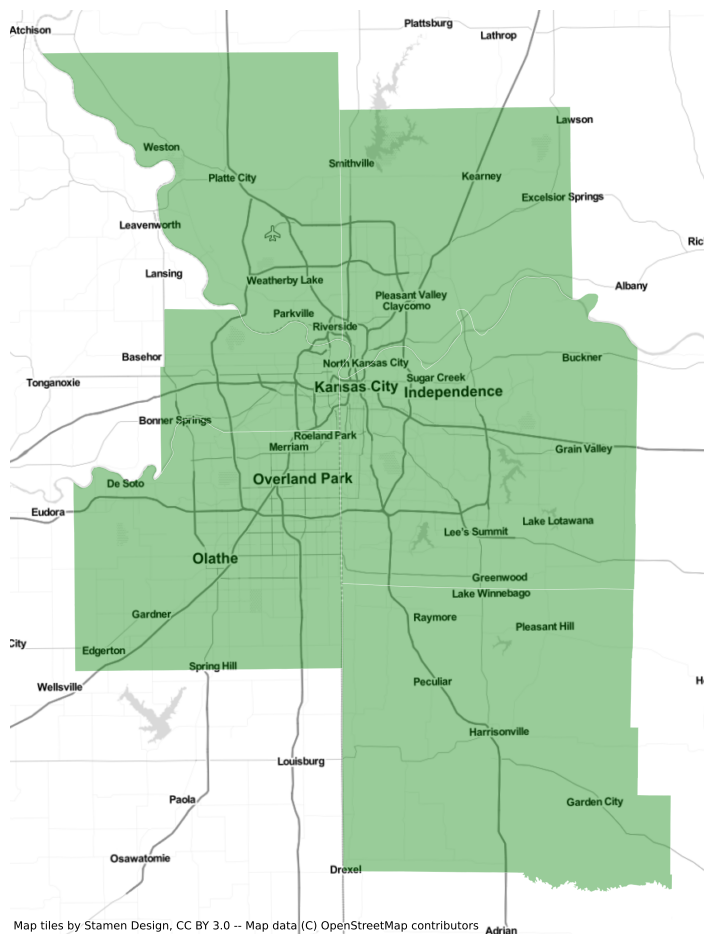

In [223]:
# plot it! This is the map of counties in the states of KS and MO 
fig, ax = plt.subplots(figsize=(12,12))

county_map.plot(ax=ax,
         color='green', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax, crs=county_map.crs.to_string(), zoom=10, source=ctx.providers.Stamen.TonerLite)


In [175]:
county=block_final_csv

In [176]:
county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37701 entries, 0 to 37700
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fid                         37701 non-null  int64  
 1   county                      37701 non-null  object 
 2   bg_gisjoin                  37701 non-null  object 
 3   b_gisjoin                   37701 non-null  object 
 4   b_population                37701 non-null  int64  
 5   bg_age_gt18                 37701 non-null  int64  
 6   bg_educ_lt_bachelors        37701 non-null  int64  
 7   bg_inc_lt_45000             37701 non-null  int64  
 8   s_bg_age_gt18               37701 non-null  float64
 9   s_bg_educ_lt_bachelors      37701 non-null  float64
 10  s_bg_inc_lt_45000           37701 non-null  float64
 11  target_density              37701 non-null  float64
 12  s_joint_age_educ_inc_adj    37701 non-null  float64
 13  b_target_pop_adj            377

In [177]:
d=county.groupby('county')['b_target_pop_adj'].sum()

In [178]:
d.head()

county
Cass County        37753.478625
Clay County        82900.503905
Jackson County    265579.551784
Johnson County    120798.459168
Miami County           9.501674
Name: b_target_pop_adj, dtype: float64

In [179]:
gdf_US_county_2021=gdf_US_county_2021.rename(columns={'NAMELSAD':'county'})

In [180]:
county_map=pd.merge(county_map, d,on=['county' ])  # merge block map and output file.

In [183]:
county_map.head()

,GISJOIN,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,county,LSAD,CLASSFP,MTFCC,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry,state,b_target_pop_adj
0,G2000910,20,091,00485010,20091,Johnson,Johnson County,06,H1,G4020,...,A,1.226680e+09,16319024.0,+38.8839065,-094.8223295,151744.230974,1.242999e+09,"POLYGON ((119412.554 173940.048, 119413.149 17...",Kansas,120798.459168
1,G2002090,20,209,00485065,20209,Wyandotte,Wyandotte County,06,H6,G4020,...,C,3.927394e+08,11801597.0,+39.1153842,-094.7630866,100895.739450,4.045410e+08,"POLYGON ((104769.055 191282.795, 104800.505 19...",Kansas,76680.735099
2,G2900370,29,037,00758473,29037,Cass,Cass County,06,H1,G4020,...,A,1.804223e+09,14963188.0,+38.6464737,-094.3545467,199164.132104,1.819187e+09,"POLYGON ((161744.629 151025.289, 161735.899 15...",Missouri,37753.478625
3,G2900470,29,047,00758478,29047,Clay,Clay County,06,H1,G4020,...,A,1.029941e+09,28508804.0,+39.3155512,-094.4215024,152360.608599,1.058450e+09,"POLYGON ((152923.987 192772.316, 152873.419 19...",Missouri,82900.503905
4,G2900950,29,095,00758502,29095,Jackson,Jackson County,06,H1,G4020,...,A,1.565699e+09,30621016.0,+39.0053640,-094.3432105,175188.865663,1.596320e+09,"POLYGON ((152923.987 192772.316, 153014.181 19...",Missouri,265579.551784


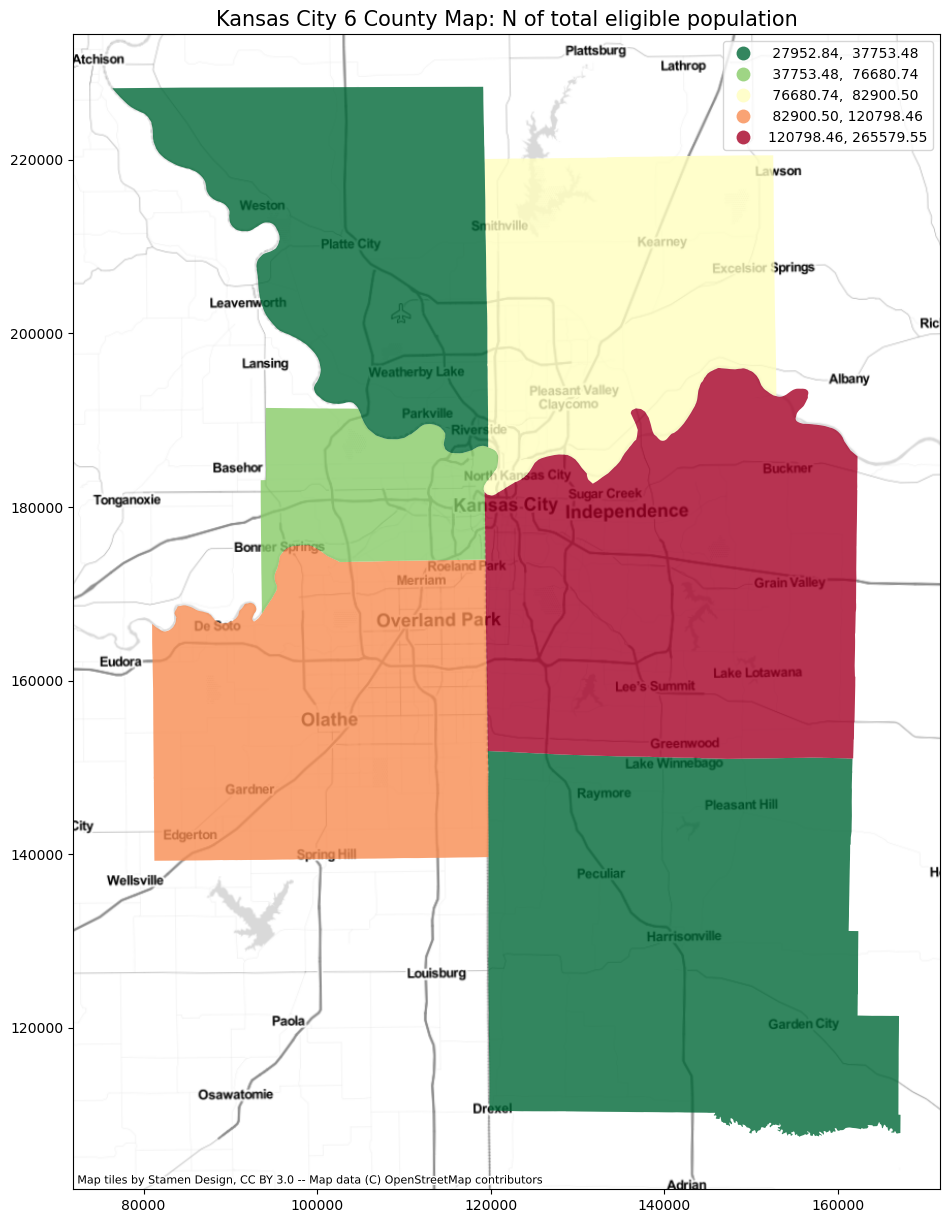

In [222]:
fig,ax = plt.subplots(figsize=(15,15))

county_map.plot(ax=ax,
        column='b_target_pop_adj', # this makes it a choropleth
        legend=True,
        alpha=0.8,
        cmap='RdYlGn_r', # a diverging color scheme
        scheme='quantiles') # how to break the data into bins
ax.set_title('Kansas City 6 County Map: N of total eligible population',fontsize=15)
# choose any of the supported maps from ctx.sources


ctx.add_basemap(ax, crs=county_map.crs.to_string(), zoom=10, source=ctx.providers.Stamen.TonerLite)


In [ ]:
### CT-level map descriptive

In [225]:
gis_map_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 37704 entries, 0 to 37703
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   FID_zip_KC                  37704 non-null  int64   
 1   GISJOIN                     37704 non-null  object  
 2   ZCTA5CE20                   37704 non-null  object  
 3   GEOID20                     37704 non-null  object  
 4   CLASSFP20                   37704 non-null  object  
 5   MTFCC20                     37704 non-null  object  
 6   Shape_Leng                  37704 non-null  float64 
 7   Shape_Area                  37704 non-null  float64 
 8   b_gisjoin                   37704 non-null  object  
 9   state                       37704 non-null  object  
 10  county_x                    37704 non-null  object  
 11  geometry                    37704 non-null  geometry
 12  fid                         37704 non-null  int64   
 13  county_y

In [226]:
sub=gis_map_final[['state','ZCTA5CE20']].drop_duplicates() ##keep the unique state-county information from the final map data.

In [227]:
shape_path_zip_6county = os.path.join(wd, 'gis_data', 'zip_KC_6county.shp')
gdf_zip_6county = gpd.read_file(shape_path_zip_6county) 


In [230]:
zipcode_map=pd.merge(gdf_zip_6county, sub,on=['ZCTA5CE20'])  # merge block map and output file.

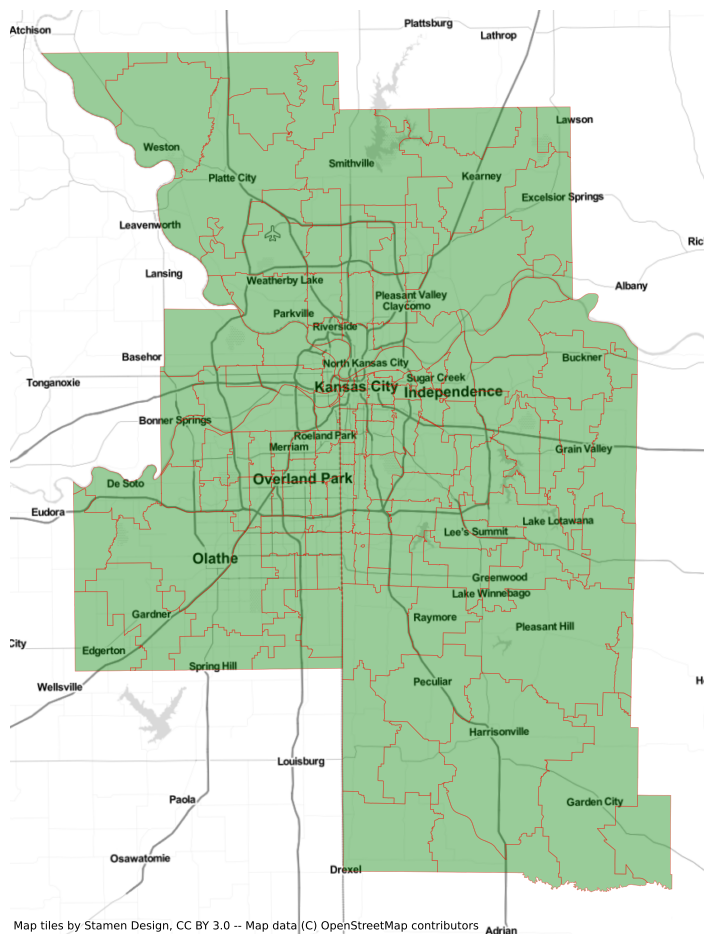

In [233]:
# plot it! This is the map of counties in the states of KS and MO 
fig, ax = plt.subplots(figsize=(12,12))

zipcode_map.plot(ax=ax,
         color='green', 
         edgecolor='red',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax, crs=zipcode_map.crs.to_string(), zoom=10, source=ctx.providers.Stamen.TonerLite)


In [239]:
zip=gis_map_final
zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 37704 entries, 0 to 37703
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   FID_zip_KC                  37704 non-null  int64   
 1   GISJOIN                     37704 non-null  object  
 2   ZCTA5CE20                   37704 non-null  object  
 3   GEOID20                     37704 non-null  object  
 4   CLASSFP20                   37704 non-null  object  
 5   MTFCC20                     37704 non-null  object  
 6   Shape_Leng                  37704 non-null  float64 
 7   Shape_Area                  37704 non-null  float64 
 8   b_gisjoin                   37704 non-null  object  
 9   state                       37704 non-null  object  
 10  county_x                    37704 non-null  object  
 11  geometry                    37704 non-null  geometry
 12  fid                         37704 non-null  int64   
 13  county_y

In [240]:
zip=zip.groupby('ZCTA5CE20')['b_target_pop_adj'].sum()

In [241]:
zip.head()

ZCTA5CE20
64012    11165.568545
64014     8115.134751
64015    10287.711999
64016     1702.028217
64018      204.127198
Name: b_target_pop_adj, dtype: float64

In [242]:
zipcode_map=pd.merge(zipcode_map, zip,on=['ZCTA5CE20' ])  # merge block map and output file.

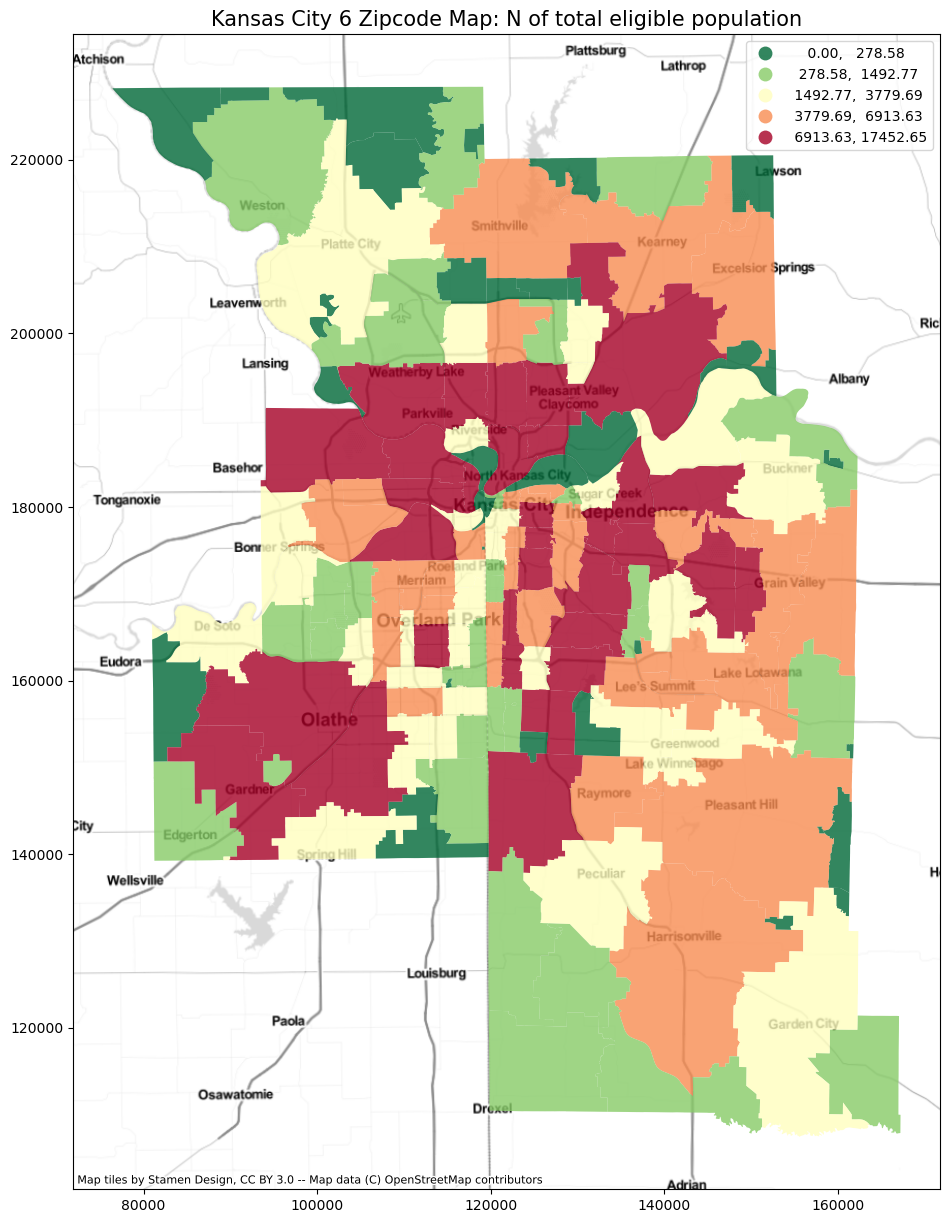

In [243]:
fig,ax = plt.subplots(figsize=(15,15))

zipcode_map.plot(ax=ax,
        column='b_target_pop_adj', # this makes it a choropleth
        legend=True,
        alpha=0.8,
        cmap='RdYlGn_r', # a diverging color scheme
        scheme='quantiles') # how to break the data into bins
ax.set_title('Kansas City 6 Zipcode Map: N of total eligible population',fontsize=15)
# choose any of the supported maps from ctx.sources


ctx.add_basemap(ax, crs=zipcode_map.crs.to_string(), zoom=10, source=ctx.providers.Stamen.TonerLite)


### Interactive map

In [148]:
# set the mapbox access token
token = 'pk.eyJ1Ijoid29ubGVlIiwiYSI6ImNqYjY0bHZlczBvMnAzMm16OTlyYWFzYnYifQ.yaLx92dXVMk1NKp5Fp7HUg'
px.set_mapbox_access_token(token)

In [150]:
# subset diamond, project to WGS84, and get its centroid
gis_map_final_cent = gis_map_final.to_crs('epsg:4326')

# what's the centroid?
minx, miny, maxx, maxy = gis_map_final_cent.geometry.total_bounds
center_lat_cent  = (maxy-miny)/2+miny
center_lon_cent = (maxx-minx)/2+minx

In [ ]:
median = gis_map_final.target_pop_per_sq_mile_adj.median()

fig = px.choropleth_mapbox(gis_map_final_cent, 
                     geojson=gis_map_final_cent.geometry, # the geometry column
                     locations=gis_map_final_cent.index, # the index
                     mapbox_style="satellite-streets",
                     zoom=9, 
                     color='target_pop_per_sq_mile_adj',
                     color_continuous_scale='RdYlGn_r',
                     color_continuous_midpoint =median, # put the median as the midpoint
                     range_color =(0,median*2),
                     hover_data=['target_pop_per_sq_mile_adj','s_joint_age_educ_inc_adj','b_population','ZCTA5CE20', 'county_x','state'],
                     center = {"lat": center_lat_cent, "lon": center_lon_cent},
                     opacity=0.8,
                     width=1000,
                     height=800,
                     labels={
                             'target_pop_per_sq_mile_adj':'N eligible pop/sq mile',
                             's_joint_age_educ_inc_adj':'Share of eligible pop',
                             'b_population': 'N total population',
                             'ZCTA5CE20':'Zipcode',
                             'county_x':'County',
                             'state':'State',
                      })
fig.update_traces(marker_line_width=0.1, marker_line_color='white')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
